# Semillas

## ¿Cuantos clusters de grano existen?

In [55]:
# LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram 
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

In [12]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/seeds.csv'
samples = np.loadtxt(ruta_archivo, delimiter = ',')
samples

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

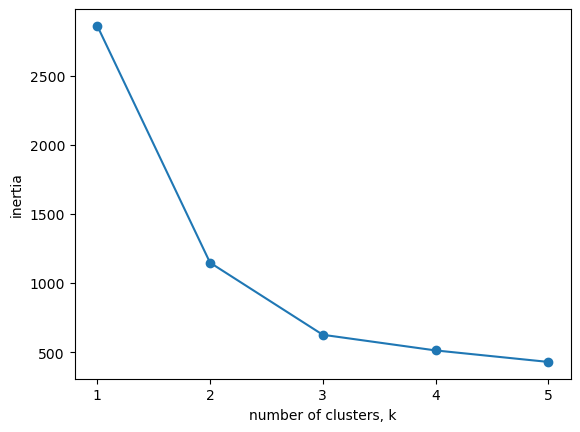

In [13]:
# Range de 1 a 5.
ks = range(1, 6)

# Crear una lista vacía para almacenar inercias.
inertias = []

# Loop de ks
for k in ks:
    # Crear una instancia de KMeans con k clusters: model
    # con n_init = 10, que se ejecuta 10 veces para diferentes
    # semillas de centroides y la mejor solución de estas 10
    # es la que se seleciona.
    model = KMeans(n_clusters = k, n_init = 10)
    
    # Ajustar modelo a muestras
    model.fit(samples)
    
    # Agregar la inercia a la lista de inertias.
    inertias.append(model.inertia_)
    
    
# Trazar ks vs inercias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**Interpretación:** En el gráfico de inercia, 3 es un buen número de grupos para los datos de grano. De hecho, las muestras de cereales proceden de una mezcla de 3 variedades de cereales diferentes: "Kama", "Rosa" y "Canadian".

## Evaluando los clusters de grano

Ahora, agrupe las muestras de granos en tres grupos y compárelos con las variedades de granos mediante una tabulación cruzada.

Tiene la variedad `"samples"` de muestras de granos y una lista `"varieties"` que indica la variedad de granos para cada muestra.


In [14]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/varieties.csv'
varieties = pd.read_csv(ruta_archivo, header = None)
varieties = varieties[0].tolist()

In [15]:
# Crear un modelo KMeans con 3 clusters: modelo
model = KMeans(n_clusters = 3, n_init = 10, random_state = 42)

# Utilizar fit_predict para ajustar el modelo y obtener etiquetas de grupo:labels
## fit_predict es lo mismo que usar .fit() y luego .predict()
labels = model.fit_predict(samples)

# Crear un DataFrame con etiquetas y variedades como columnas: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],[df['varieties']])

# Display ct
print(ct)

varieties   Trigo rosa   trigo canadiense  Trigo Kama
labels                                               
0                   60                  0           1
1                    0                 70           5
2                   10                  0          64


## Agrupamiento jerárquico (clustering Heirarchical).

Utilizaremos la función `linkage()` para obtener una agrupación jerárquica de las muestras de grano y utilizaremos `dendrogram()` para visualizar el resultado. 

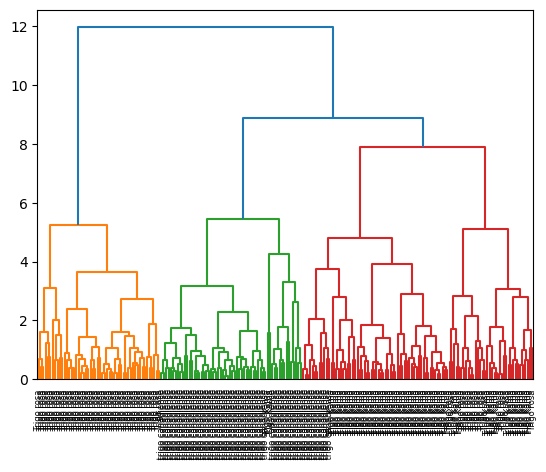

In [16]:
# Calcular linkage: mergings
mergings = linkage(samples, method = 'complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6
)
plt.show()

### Extracción de las etiquetas de los clusters

Extraeremos las etiquetas de los conglomerados de este agrupamiento intermedio, y compararemos las etiquetas con las variedades de grano utilizando una tabulación cruzada.

La agrupación jerárquica ya se ha realizado y la fusión es el resultado de la función linkage(). La lista variedades proporciona la variedad de cada muestra de grano.

In [17]:
# Usar fcluster para extraer labels: labels
labels = fcluster(mergings, 6, criterion = 'distance')

# Crear un DataFrame con labels y varieties cómo columnas: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Crear crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Mostrar ct
print(ct)

varieties   Trigo rosa   trigo canadiense  Trigo Kama
labels                                               
1                   52                  0           0
2                    0                 58           2
3                    0                 12          50
4                   18                  0          18


### Visualización t-SNE del conjunto de datos de granos

Aplicaremos t-SNE a los datos de muestras de granos e inspeccionaremos las características t-SNE resultantes utilizando un gráfico de dispersión. 

Convertiremos un array llamado `samples` de muestras de grano y una lista `variety_numbers` que da el número de variedad de cada muestra de grano.

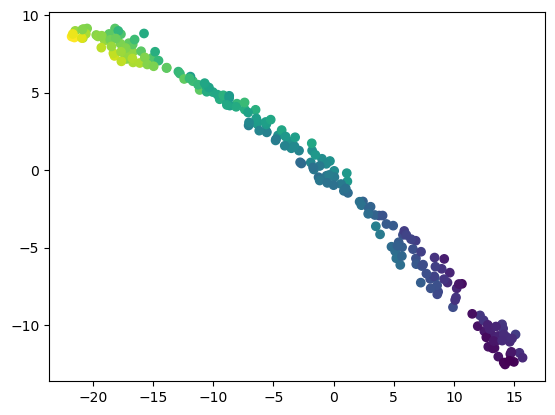

In [28]:
# Crear un array llamado sample que excluya la ultima columna
samples = samples[:, :-1]

# Crear una lista llamada variety_numbers que solo incluya la última columna
variety_numbers = samples[:, -1].tolist()

# Crear una instacia TSNE: model
model = TSNE(learning_rate = 200)

# Aplicar fit_transform a samples: tsne_features
tsne_features = model.fit_transform(samples)

# Seleccionar la característica 0: xs
xs = tsne_features[:,0]

# Seleccionar la característica 1: ys
ys = tsne_features[:,1]

# Dibujar un diagrama de dispersión, colorear por variety_numbers
plt.scatter(xs, ys, c = variety_numbers)
plt.show()

## Datos correlacionados en Semillas

Se nos da una matriz de granos que da la anchura y la longitud de muestras de grano. Sospechas que la anchura y la longitud están correlacionadas. Para confirmarlo, haremos un diagrama de dispersión de la anchura frente a la longitud y midiremos la correlación de Pearson.

In [33]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/seeds-width-vs-length.csv'
grains = np.loadtxt(ruta_archivo, delimiter = ',')
grains[:5]

array([[3.312, 5.763],
       [3.333, 5.554],
       [3.337, 5.291],
       [3.379, 5.324],
       [3.562, 5.658]])

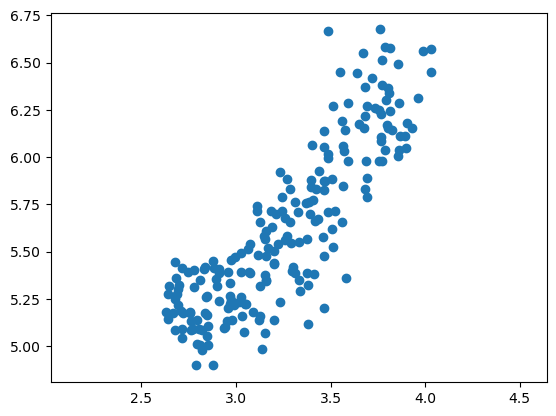

0.8604149377143469


In [53]:
# Asignar la columna 0 de granos: width 
width = grains[:,0]

# Asignar la 1ª columna de granos: length 
length = grains[:,1] 

# Dibujar un diagrama de dispersión Ancho largo 
plt.scatter(width, length) 
plt.axis('igual') 
plt.show() 

# Calcular la correlación de Pearson 
correlation, pvalue = pearsonr(width, length)

# Mostrar la correlación 
print(correlation)

### Correlación de las medidas del grano con PCA

Observamos que las medidas de anchura y longitud del grano están correlacionadas. Ahora, utilizaremos PCA para descorrelacionar estas medidas, luego trazaremos los puntos descorrelacionados y mediremos su correlación de Pearson.

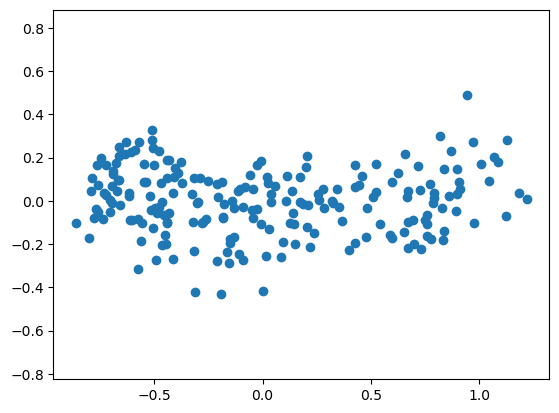

7.676151381197371e-17


In [56]:
# Crear instancia de PCA: model
model = PCA()

# Aplicar el método de modelo fit_transform a grains: pca_features
pca_features = model.fit_transform(grains)

# Asignar la columna 0 de pca_features: xs
xs = pca_features[:,0]

# Asignar la primera columna de pca_features: ys
ys = pca_features[:,1]

# Diagrama de dispersión xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calcular la correlación de Pearson de xs e ys
correlation, pvalue = pearsonr(xs, ys)

# Mostrar la correlación
print(correlation)

### El primer componente principal

El primer componente principal de los datos es la dirección en la que los datos varían más. 

Utilizaremos  PCA para encontrar el primer componente principal de las medidas de longitud y anchura de las muestras de granos, y representaremos como una flecha en el diagrama de dispersión.

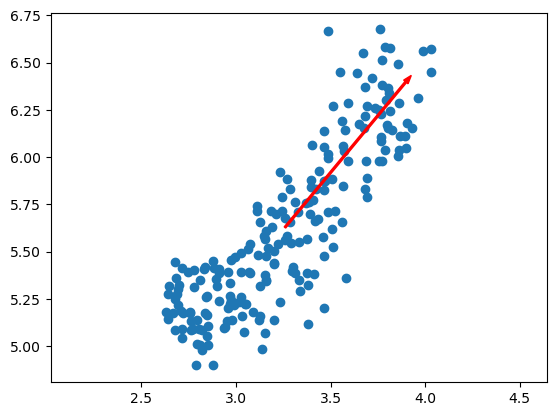

In [59]:
# Hacer un gráfico de dispersión de los puntos sin transformar
plt.scatter(grains[:,0], grains[:,1])

# Crear una instancia de PCA: model
model = PCA()

# Ajustar el modelo a los puntos
model.fit(grains)

# Obtener la media de las muestras de granos: mean
mean = model.mean_

# Obtener el primer componente principal: first_pc
first_pc = model.components_[0,:]

# Dibujar first_pc como una flecha, comenzando en mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Mantener las escalas de los ejes iguales
plt.axis('equal')
plt.show()